In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import seaborn as sns

In [50]:
import csv
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
fraud=pd.read_csv('anonymized.csv')

fraud['real_date'] = pd.to_datetime(fraud['Date'],errors = 'coerce', format ='%d%b%Y')
count_each_month=fraud.groupby([fraud['real_date'].dt.year,fraud['real_date'].dt.month]).agg({'count'})
counts=np.asarray(count_each_month['Date'])
counts = counts.reshape(-1,1)
kde1 = KernelDensity(kernel='gaussian', bandwidth=3.5).fit(counts)
new_data_months = kde1.sample(1000, random_state=0)


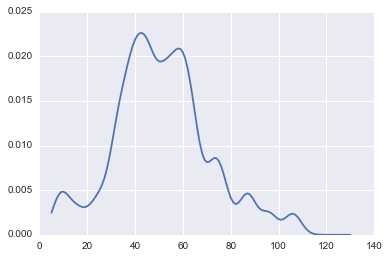

In [60]:
X_plot = np.linspace(5, 130, 126)[:, np.newaxis]
dens = np.exp(kde1.score_samples(X_plot))
density = plt.plot(X_plot[:, 0], dens)
plt.show()

In [74]:
ndens = list(dens).append(1-sum(dens))

In [53]:
count_each_day=fraud.groupby([fraud['real_date'].dt.year,fraud['real_date'].dt.month,
                              fraud['real_date'].dt.date]).agg({'count'})
count_each_day=np.asarray(count_each_day['Date'])
counts_day=count_each_day.reshape(-1,1)
kde2 = KernelDensity(kernel='gaussian', bandwidth=3.5).fit(counts_day)
new_data_days = kde2.sample(1000, random_state=0)

In [91]:
max(counts_day)

array([15])

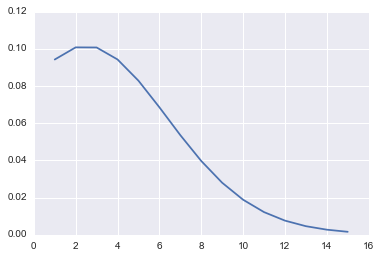

In [108]:
X2_plot = np.array(range(1,16)).reshape(-1,1)
dens2 = np.exp(kde2.score_samples(X2_plot))
plt.plot(X2_plot[:, 0], dens2)


In [57]:
amount = np.array(fraud.Amount.values).reshape(-1,1)
kde3 = KernelDensity(kernel='gaussian', bandwidth=3.5).fit(amount)
new_data_amounts = kde3.sample(1000, random_state=0)

In [64]:
max(amount)-min(amount)

array([ 95296.3])

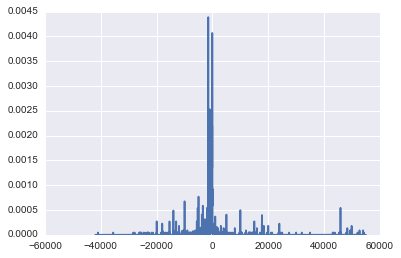

In [65]:
X3_plot = np.linspace(-42000, 55000, 100000 )[:, np.newaxis]
dens3 = np.exp(kde3.score_samples(X3_plot))
plt.plot(X3_plot[:, 0], dens3)


In [78]:
nmonth = []
for i in range(1000):
    nmonth.append(np.random.choice(np.arange(0, 127), p = ndens))
int(np.mean(nmonth))

63

Firstly, I sample the number of transaction in a month 

In [ ]:
num_trans_per_month = kde1.sample(12, random_state=0)
num_trans_per_month = num_trans_per_month.reshape(-1,)
num_trans_per_month=[round(i) for i in num_trans_per_month]

Secondly, I sample the number of transaction in each day

In [ ]:
num_trans_per_day=[]
for i in range(12):
    num_trans = kde2.sample(31)
    num_trans = [round(j) for j in thirty_one_sample_days]
    num_trans_per_day.append(num_trans)
for i in range(12):
    sample_days[i]=[int(j) for j in (np.array(sample_days[i])
                                     *twelve_sample_months[i])
                                    /float(sum(sample_days[i]))]



Thirdly, I sample the amount in each transaction

In [ ]:
fake_data=[]
for i in range(12):
    fake_data.append(kde3.sample(sum(sample_days[i]), random_state=0))
    fake_data[i] = fake_data[i].reshape(1,-1)[0]

Print out the fake data 

In [ ]:
count_trans=0
count_day=1
for j in [int(l) for l in sample_days[0]]:
    print "On day", count_day, "of this fictitious month, we have the following transactions:"
    count_day+=1
    for k in range(j):
        print "Transaction of", fake_data[0][count_trans]
        count_trans+=1

Some flaws that still remain in my model that a forensic accountant might be able to find and determine that this was a fraudulent set of transactions:
Because I sampled the number of transaction per day from the density distribution, everyday, there is at least one transaction, while in the real data there are days in which there are no transaction. (this is due to the fact if there is a day with no transaction, it didn't even appear in the data, so our density model has no value of 0, and starts from 1 instead) 
This way of sampling doesn't capture the difference of patterns underlying the data for different month. for example, if i'm faking data for January, the transaction per month and amount in this month are impacted by the choice of this month. 